# Gold Comparison Capstone: Part 1 - Data Wrangling

For this capstone I have collected a total of five different csv files. They are:
1. "Barrick Gold Corp 1985-2020.csv"
2. "gold-price-last-ten-years.csv"
3. "BTC-USD 2014-2020.csv"
4. "silver history.csv"
5. "SP500 2007-2020.csv"

The purpose of this capstone is to conduct a small scale test of the hypothesis that when the stock market goes down in value (represented by the S&P500 index), the value of gold increases. To test this further, I have included several other sets of data: the value of silver, the stock value of Barrick Gold Corp (a gold mining company), and the value of Bitcoin to the US dollar. 

The reasoning for including silver is to see if this trend is unique to gold, or if other precious metals increase in value as the stock market declines. 

The stock value of Barrick Gold Corp. is included in order to see if the stock value of gold mining companies also increases in value in correlation to the value of gold and the S&P500 index. 

Finally, Bitcoin has been included simply because of its volatile nature in comparison to the rest of the values.

The final test for this data will be to construct a train/test pipeline that attempts to accurately predict the value of gold depending on the value of the other stocks and indexes provided. 

To begin, I will clean the data in order to properly merge and compare it in a single dataframe.

In [1]:
# To begin, I will import the "gold-price-last-ten-years.csv," and "SP500 2007-2020.csv" 
# in order to merge them together along the date column.

import pandas as pd # for importing, reading, cleaning csv files
import numpy as np # for maths, of course
import matplotlib.pyplot as plt # so we can plot
import seaborn as sns # so we can beautify the plots

path = 'C:\\Users\\mccal\\Desktop\\Springboard Files\\Springboard Capstone data\\BTG Capstone\\'

# There is a lot of text prior to the actual columns, so the header has \
# been set appropriatley.
gold = pd.read_csv('gold-price-last-ten-years.csv', sep=',', header=8)

gold.head()

date    value
0  2010-08-25  1237.50
1  2010-08-26  1240.25
2  2010-08-27  1234.50
3  2010-08-31  1233.50
4  2010-09-01  1250.00

In [2]:
# First things first, change 'date' column to actual date 
# format with 'pd.to_datetime()'
gold['date']=pd.to_datetime(gold['date'])

# Remove the dates we don't care aout from the data.
focus = (gold['date'] > '2014-09-16') & (gold['date'] <= '2020-08-21')

gold = gold.loc[focus]

gold.head()

date   value
1025 2014-09-17  1236.5
1026 2014-09-18  1223.0
1027 2014-09-19  1222.5
1028 2014-09-22  1214.0
1029 2014-09-23  1225.0

In [3]:
# Renaming the columns to something more 'formal' helps me visualize 
# the final plot and table I have in mind.
gold.columns = ['Date', 'GLD(USD)']
gold.head()

Date  GLD(USD)
1025 2014-09-17    1236.5
1026 2014-09-18    1223.0
1027 2014-09-19    1222.5
1028 2014-09-22    1214.0
1029 2014-09-23    1225.0

In [4]:
# We are going to be checking for NaN values in the data quite 
# frequently in order to monitor changes and loss of data as we clean. 
# Best to write a function for checking NaN now and speed things up! Let's
# have a function that gives us the percentage that NaN values make up in 
# the data.
def show_na(df):
    na_df = pd.concat([df.isnull().sum(), 100 * df.isnull().mean()], axis=1)
    na_df.columns=['count', '%']
    na_df.sort_values(by='count', ascending = False)
    return na_df
# Use the function
show_na(gold)

#Sweet, no Nan's thus far.

count    %
Date          0  0.0
GLD(USD)      0  0.0

Now that I have imported and sorted Gold(GLD), it's time to bring in a second dataframe and begin merging them together. 
Each of the dataframes I have for this project have different start dates, but they all have the same end date. So, in order to have consistency across all of the data, I am going to import the Bitcoin(BTC) dataframe next, as it has the most recent start date of 09-17-2014.
Then I will merge BTC along the 'Date' column of our main dataframe. This way the dataframe will only keep the dates which they share.

In [5]:
# Import the Bitcoin csv as BTC 
BTC = pd.read_csv('BTC-USD 2014-2020.csv')
BTC.head()

Date        Open        High         Low       Close   Adj Close  \
0  2014-09-17  465.864014  468.174011  452.421997  457.334015  457.334015   
1  2014-09-18  456.859985  456.859985  413.104004  424.440002  424.440002   
2  2014-09-19  424.102997  427.834991  384.532013  394.795990  394.795990   
3  2014-09-20  394.673004  423.295990  389.882996  408.903992  408.903992   
4  2014-09-21  408.084991  412.425995  393.181000  398.821014  398.821014   

       Volume  
0  21056800.0  
1  34483200.0  
2  37919700.0  
3  36863600.0  
4  26580100.0

In [6]:
# Since we are only concerned with the closing value, we will drop the other
# columns and keep only 'Date,' and 'Adj Close,' columns.
BTC = BTC[['Date', 'Adj Close']]
BTC.columns = ['Date', 'BTC(USD)']

# Just to be sure before we do our first merge, I set the time frame that we
# care about again.
focus = (BTC['Date'] > '2014-09-16') & (BTC['Date'] <= '2020-08-21')

BTC = BTC.loc[focus]

BTC.head()

Date    BTC(USD)
0  2014-09-17  457.334015
1  2014-09-18  424.440002
2  2014-09-19  394.795990
3  2014-09-20  408.903992
4  2014-09-21  398.821014

In [7]:
# Don't forget to convert the 'Date' column with pd.to_datetime()
BTC['Date']=pd.to_datetime(BTC['Date'])
BTC.head()

Date    BTC(USD)
0 2014-09-17  457.334015
1 2014-09-18  424.440002
2 2014-09-19  394.795990
3 2014-09-20  408.903992
4 2014-09-21  398.821014

In [8]:
# Check for Nan
show_na(BTC)

count         %
Date          0  0.000000
BTC(USD)      1  0.046168

In [9]:
# Let's forward fill (ffill) that one Nan.
BTC = BTC.fillna(axis=0, method='ffill')

In [10]:
# Now, we are going to have a single dataframe upon which we merge 
# all others. So rename 'BTC' to 'maindf,' and merge the 'gold'
# on the shared 'Date' column so that the dates column is retained 
# and the only Nan's generated will be  in the value columns. Merging
# into 'maindf' also gurantees that the original dataframes are kept 
# after the merge.
maindf=BTC.merge(gold, how='left', on='Date')
maindf.head()

Date    BTC(USD)  GLD(USD)
0 2014-09-17  457.334015    1236.5
1 2014-09-18  424.440002    1223.0
2 2014-09-19  394.795990    1222.5
3 2014-09-20  408.903992       NaN
4 2014-09-21  398.821014       NaN

So, first thing I notice is new Nan's, which means that there were new dates added. This makes sense as Bitcoin is traded all day, every day and the stock market is closed on weekends and certain holidays. So, with that said, we should have about 30% Nan values in the Gold data set. We  will address this at the end. 

In [11]:
# Check for Nan
show_na(maindf)

count         %
Date          0   0.00000
BTC(USD)      0   0.00000
GLD(USD)    652  30.10157

In [12]:
# Import the next csv and repeat
sp500=pd.read_csv('SP500 2007-2020.csv', sep=',', header=7)
sp500.head()

date    value
0  2007-08-27  1466.79
1  2007-08-28  1432.36
2  2007-08-29  1463.76
3  2007-08-30  1457.64
4  2007-08-31  1473.99

In [13]:
sp500['date'] = pd.to_datetime(sp500['date'])
sp500.head()

date    value
0 2007-08-27  1466.79
1 2007-08-28  1432.36
2 2007-08-29  1463.76
3 2007-08-30  1457.64
4 2007-08-31  1473.99

In [14]:
# Rename columns for appropriate representation.
sp500.columns = ['Date', 'S&P500(USD)']
sp500.head()

Date  S&P500(USD)
0 2007-08-27      1466.79
1 2007-08-28      1432.36
2 2007-08-29      1463.76
3 2007-08-30      1457.64
4 2007-08-31      1473.99

In [15]:
# Since GLD and S&P500 are both stock indexes, 
# they should have almost identical Nan's.
maindf=maindf.merge(sp500, how='left', on='Date')
maindf

Date      BTC(USD)  GLD(USD)  S&P500(USD)
0    2014-09-17    457.334015   1236.50      2001.57
1    2014-09-18    424.440002   1223.00      2011.36
2    2014-09-19    394.795990   1222.50      2010.40
3    2014-09-20    408.903992       NaN          NaN
4    2014-09-21    398.821014       NaN          NaN
...         ...           ...       ...          ...
2161 2020-08-17  12254.402344   1949.85      3381.99
2162 2020-08-18  11991.233398   2005.15      3389.78
2163 2020-08-19  11758.283203   1993.15      3374.85
2164 2020-08-20  11878.372070   1928.05      3385.51
2165 2020-08-21  11592.489258   1932.85      3397.16

[2166 rows x 4 columns]

In [16]:
show_na(maindf)

count          %
Date             0   0.000000
BTC(USD)         0   0.000000
GLD(USD)       652  30.101570
S&P500(USD)    672  31.024931

In [17]:
barrick = pd.read_csv('Barrick Gold Corp 1985-2020.csv', sep=',', header=9)

barrick.head(5)

date    open    high     low   close  volume
0  1985-02-04  1.9985  2.1025  1.9985  1.9985   50400
1  1985-02-05  1.9985  2.2065  1.9985  1.9985   18400
2  1985-02-06  2.1025  2.3648  2.1025  2.1025   65600
3  1985-02-07  2.1025  2.2065  2.1025  2.1025   40000
4  1985-02-08  2.1025  2.2065  2.1025  2.1025   25600

In [18]:
barrick['date'] = pd.to_datetime(barrick['date'])
barrick = barrick[['date', 'close']]

In [19]:
barrick.columns = ['Date','GOLD(USD)']
barrick.head()

Date  GOLD(USD)
0 1985-02-04     1.9985
1 1985-02-05     1.9985
2 1985-02-06     2.1025
3 1985-02-07     2.1025
4 1985-02-08     2.1025

In [20]:
maindf = maindf.merge(barrick, how='left', on='Date')
maindf.head()

Date    BTC(USD)  GLD(USD)  S&P500(USD)  GOLD(USD)
0 2014-09-17  457.334015    1236.5      2001.57    15.5009
1 2014-09-18  424.440002    1223.0      2011.36    15.2624
2 2014-09-19  394.795990    1222.5      2010.40    14.9285
3 2014-09-20  408.903992       NaN          NaN        NaN
4 2014-09-21  398.821014       NaN          NaN        NaN

In [21]:
show_na(maindf)

count          %
Date             0   0.000000
BTC(USD)         0   0.000000
GLD(USD)       652  30.101570
S&P500(USD)    672  31.024931
GOLD(USD)      672  31.024931

In [22]:
silver = pd.read_csv('silver history.csv', sep=',', header=7)
silver.head()

date   value
0  2007-08-28   11.83
1  2007-08-29   11.80
2  2007-08-30   11.86
3  2007-08-31   11.95
4  2007-09-03   12.10

In [23]:
silver['date']=pd.to_datetime(silver['date'])
silver.head()

date   value
0 2007-08-28   11.83
1 2007-08-29   11.80
2 2007-08-30   11.86
3 2007-08-31   11.95
4 2007-09-03   12.10

In [24]:
silver.columns = ['Date', 'SLV(USD)']
silver.head()

Date  SLV(USD)
0 2007-08-28     11.83
1 2007-08-29     11.80
2 2007-08-30     11.86
3 2007-08-31     11.95
4 2007-09-03     12.10

In [25]:
maindf = maindf.merge(silver, how='left', on='Date')
maindf.head()

Date    BTC(USD)  GLD(USD)  S&P500(USD)  GOLD(USD)  SLV(USD)
0 2014-09-17  457.334015    1236.5      2001.57    15.5009     18.63
1 2014-09-18  424.440002    1223.0      2011.36    15.2624     18.50
2 2014-09-19  394.795990    1222.5      2010.40    14.9285     18.45
3 2014-09-20  408.903992       NaN          NaN        NaN       NaN
4 2014-09-21  398.821014       NaN          NaN        NaN       NaN

In [26]:
show_na(maindf)

count          %
Date             0   0.000000
BTC(USD)         0   0.000000
GLD(USD)       652  30.101570
S&P500(USD)    672  31.024931
GOLD(USD)      672  31.024931
SLV(USD)       647  29.870729

In [27]:
# Check for duplicate dates before setting index on "Date"
maindf['Date'].value_counts().head()

2016-11-14    1
2019-09-16    1
2017-08-28    1
2015-10-21    1
2016-12-11    1
Name: Date, dtype: int64

In [28]:
#Set index to 'Date'  for graphing and visualization
maindf= maindf.set_index('Date')
maindf.head()

BTC(USD)  GLD(USD)  S&P500(USD)  GOLD(USD)  SLV(USD)
Date                                                              
2014-09-17  457.334015    1236.5      2001.57    15.5009     18.63
2014-09-18  424.440002    1223.0      2011.36    15.2624     18.50
2014-09-19  394.795990    1222.5      2010.40    14.9285     18.45
2014-09-20  408.903992       NaN          NaN        NaN       NaN
2014-09-21  398.821014       NaN          NaN        NaN       NaN

In [29]:
# Now, to deal with the Nan's. The best option I propose is to forward fill
# the missing values since the values do not change much over the weekends.
# Lets be careful though and observe the mean, std deviation, etc of each
# column before we use ffill.
maindf.describe()

BTC(USD)     GLD(USD)  S&P500(USD)    GOLD(USD)     SLV(USD)
count   2166.000000  1514.000000  1494.000000  1494.000000  1519.000000
mean    4319.095491  1310.203666  2496.003246    14.822713    16.590012
std     4095.257714   170.517162   404.167387     4.621470     1.825305
min      178.102997  1049.600000  1829.080000     5.751500    11.772000
25%      430.568237  1208.462500  2099.147500    12.141925    15.399500
50%     3564.492798  1271.400000  2471.075000    13.940050    16.510000
75%     7804.194214  1335.600000  2823.647500    17.337500    17.399500
max    19497.400391  2061.500000  3397.160000    30.130000    29.261000

In [30]:
# Now use ffill to remove the Nan's
maindf = maindf.fillna(axis=0, method='ffill')

In [31]:
# Lets look at the overall summary of each column again.
maindf.describe()

BTC(USD)     GLD(USD)  S&P500(USD)    GOLD(USD)     SLV(USD)
count   2166.000000  2166.000000  2166.000000  2166.000000  2166.000000
mean    4319.095491  1310.235249  2495.562004    14.799460    16.567624
std     4095.257714   170.160135   403.820978     4.591783     1.787316
min      178.102997  1049.600000  1829.080000     5.751500    11.772000
25%      430.568237  1207.700000  2099.060000    12.139200    15.392000
50%     3564.492798  1271.400000  2471.875000    13.887600    16.480500
75%     7804.194214  1335.775000  2823.647500    17.326875    17.382000
max    19497.400391  2061.500000  3397.160000    30.130000    29.261000

So using ffill had no significant impact on the std dev or mean for any of the columns. We can see that the strongest change was probably to silver, with its std dev going from 1.825 to 1.787.  Still, not significant. 

In [32]:
# Double  check, but there should't be any  nan values now.
maindf.isnull().sum()

BTC(USD)       0
GLD(USD)       0
S&P500(USD)    0
GOLD(USD)      0
SLV(USD)       0
dtype: int64

Sweet, so everything is clean now. No duplicate dates and no NaN  values. Now lets finally take a look to see if there  is any correlation among these datasets. Lets first look at a timeline graph of all the columns to see if anything stands out.

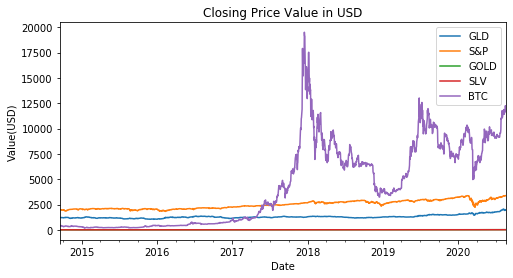

In [33]:
maindf['GLD(USD)'].plot(label='GLD',figsize=(8,4), title='Closing Price Value in USD')
maindf['S&P500(USD)'].plot(label='S&P')
maindf['GOLD(USD)'].plot(label='GOLD')
maindf['SLV(USD)'].plot(label='SLV')
maindf['BTC(USD)'].plot(label='BTC')

plt.xlabel('Date')
plt.ylabel('Value(USD)')
plt.legend();

Welp, it appears that Bitcoin has had such high values and variability that we can't even see the fluxuation of Barrick  Gold Corp (GOLD) or Silver (SLV). Keep in mind that we can always scale the data to make it more observable, but lets save that for the end. Let's use seaborns heatmap correlation instead.

Text(0.5, 1.05, 'Correlation of MainDF Features')

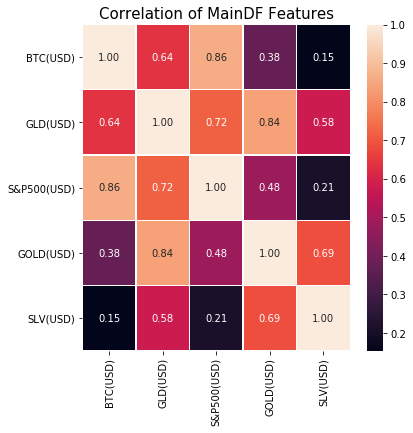

In [34]:
corr = maindf.corr()
plt.figure(figsize = (6,6))
sns.heatmap(corr,
           xticklabels=corr.columns.values,
           yticklabels=corr.columns.values,
           annot=True, fmt='.2f', linewidths=.30)
plt.title('Correlation of MainDF Features', y =1.05,  size=15)

That's a lot easier to read and make note of correlations. It looks like the value of gold (GLD) is significantly correlated with the value of the S&P 500 index (S&P500). In addition, there are several other noteworthy correlations, such as silvers correlation to Barrick Gold Corp and Bitcoins correlation to S&P500.